In [1]:
import pandas as pd
import numpy as np
import math
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import erfinv
import math

In [2]:
N = 10000 
p1 = 0.05
p0 = 0.95
dataset=np.array([[]])

In [3]:
for i in range(0,N):
  y = np.random.binomial(1,p1,1)
  if y[0]==0:
    x = np.random.normal(0,1,1)
  else:
    x = np.random.normal(1,1,1)
  if i==0:
    dataset=np.array([[x[0],y[0]]])
  else:
    dataset=np.append(dataset,np.array([[x[0],y[0]]]),axis=0)
dataset

array([[-1.36192606e-03,  0.00000000e+00],
       [ 7.00199035e-01,  1.00000000e+00],
       [ 2.54525986e+00,  0.00000000e+00],
       ...,
       [-9.25019103e-01,  0.00000000e+00],
       [ 7.39798762e-01,  1.00000000e+00],
       [-1.04730456e-01,  0.00000000e+00]])

In [4]:
dataset.shape

(10000, 2)

In [5]:
df=pd.DataFrame(dataset)
df

,0,1
0,-0.001362,0.0
1,0.700199,1.0
2,2.545260,0.0
3,-2.106644,0.0
4,1.974538,1.0
...,...,...
9995,-1.141951,0.0
9996,0.495437,0.0
9997,-0.925019,0.0
9998,0.739799,1.0


In [6]:
df.rename(columns={0:'X',1:'Y'},inplace=True)
df

,X,Y
0,-0.001362,0.0
1,0.700199,1.0
2,2.545260,0.0
3,-2.106644,0.0
4,1.974538,1.0
...,...,...
9995,-1.141951,0.0
9996,0.495437,0.0
9997,-0.925019,0.0
9998,0.739799,1.0


In [7]:
Hb = np.zeros(N)

In [8]:
def f0(x, mu=0, sigma=1):
    x = float(x - mu) / sigma
    return math.exp(-x*x/2.0) / math.sqrt(2.0*math.pi) / sigma

def f1(x, mu=1, sigma=1):
    x = float(x - mu) / sigma
    return math.exp(-x*x/2.0) / math.sqrt(2.0*math.pi) / sigma


In [9]:
for i in range(0,N):
  y=df.iloc[i][1]
  x=df.iloc[i][0]
  Q1=(p1*f1(x))/(p1*f1(x)+p0*f0(x))
  Q0=(p0*f0(x))/(p1*f1(x)+p0*f0(x))
  if Q1>=Q0:
    Hb[i] = 1
  else:
    Hb[i] = 0
  

In [10]:
df['Hb']=Hb
df

,X,Y,Hb
0,-0.001362,0.0,0.0
1,0.700199,1.0,0.0
2,2.545260,0.0,0.0
3,-2.106644,0.0,0.0
4,1.974538,1.0,0.0
...,...,...,...
9995,-1.141951,0.0,0.0
9996,0.495437,0.0,0.0
9997,-0.925019,0.0,0.0
9998,0.739799,1.0,0.0


In [11]:
f=np.zeros((2,2))

In [12]:
for i in range(0,df.shape[0]):
    if df.iloc[i][1]==1:
        if df.iloc[i][2]==1:
            f[0][0]+=1
        else:
            f[1][0]+=1
    else:
        if df.iloc[i][2]==1:
            f[0][1]+=1
        else:
            f[1][1]+=1

In [13]:
f

array([[3.000e+00, 3.000e+00],
       [5.420e+02, 9.452e+03]])

In [14]:
TP=f[0][0]
TN=f[1][1]
FP=f[0][1]
FN=f[1][0]

In [15]:
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print("Precision: " +str(precision))
print("Recall: " +str(recall))


Precision: 0.5
Recall: 0.005504587155963303


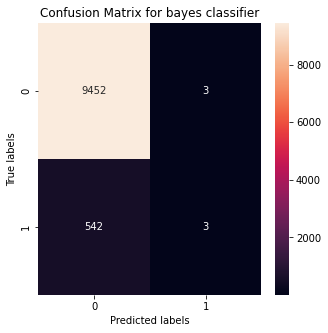

In [16]:
confusionMat=sklearn.metrics.confusion_matrix(df['Y'],df['Hb'])
confusionMat
ax= plt.subplots(figsize=(5,5))

ax=sns.heatmap(confusionMat, annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for bayes classifier'); 

In [17]:
cntOfWrongPred=0
for i in range(0,N):
  y=df.iloc[i][1]
  hb=df.iloc[i][2]
  if y!=hb:
    cntOfWrongPred+=1

Perr=cntOfWrongPred/N
Perr

0.0545

In [18]:
df2=pd.DataFrame(dataset)
df2

,0,1
0,-0.001362,0.0
1,0.700199,1.0
2,2.545260,0.0
3,-2.106644,0.0
4,1.974538,1.0
...,...,...
9995,-1.141951,0.0
9996,0.495437,0.0
9997,-0.925019,0.0
9998,0.739799,1.0


In [19]:
df2.rename(columns={0:'X',1:'Y'},inplace=True)
df2

,X,Y
0,-0.001362,0.0
1,0.700199,1.0
2,2.545260,0.0
3,-2.106644,0.0
4,1.974538,1.0
...,...,...
9995,-1.141951,0.0
9996,0.495437,0.0
9997,-0.925019,0.0
9998,0.739799,1.0


## Q2 (d)
#### According to neyman pearson classifier, let us say the type 1 error that is Probability of false alarm is upper bounded by some alpha, then the classifier would predict class 1 if f1/f0 > K where K is such that P(f1/f0<=K | X belongs to class 0)=1-alpha.
#### Using these calculations, for the class conditional densities given in question, classifier would predict class 1 if X>tau, where  tau = erfinverse(1-2*alpha)*(2^(1/2))

In [20]:
alpha=0.2
tau=erfinv(1-2*alpha)*(math.sqrt(2))

In [21]:
y_pred=np.zeros(df2.shape[0])
for i in range(0,df2.shape[0]):
    if df2.iloc[i]['X']>tau:
        y_pred[i]=1
    else:
        y_pred[i]=0

In [22]:
sklearn.metrics.accuracy_score(y_pred,df2["Y"])

0.7849

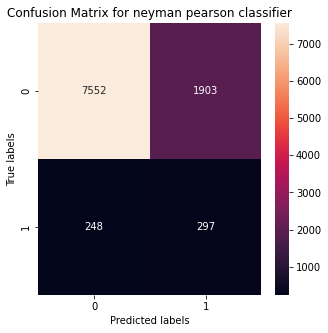

In [23]:
confusionMat=sklearn.metrics.confusion_matrix(df2['Y'],y_pred)
confusionMat
ax= plt.subplots(figsize=(5,5))

ax=sns.heatmap(confusionMat, annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for neyman pearson classifier'); 

## Q2 (e)
#### ROC curve is a plot between Probability of correct detection and Probability of false alarm for different thresholds.
#### H(x)=1 if x>=tau
#### H(x)=0 if x < tau
#### So Pcd=1-P(x <= tau | X belongs to class 1) Pfa=P(x>tau | X belongs to class 0)
#### By elimination tau from these two equations, we would get a relationship between Pcd and Pfa which has been shown in function "calc"


In [24]:
def calc(Pfa):
    Pcd=-(math.erf(erfinv(1-2*Pfa)-1.0/math.sqrt(2))-1.0)/2.0
    return Pcd

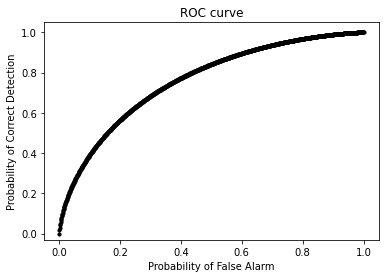

In [25]:
Pfas=np.linspace(0,1,1000)
for i in range(0,len(Pfas)):
    plt.scatter(Pfas[i],calc(Pfas[i]),s=10,c=["black"])
plt.title("ROC curve")
plt.ylabel("Probability of Correct Detection")
plt.xlabel("Probability of False Alarm")
plt.show()

## Q2 (f)
#### Considering that cost of P(h(x)!=y|y=0) and P(h(x)!=y|y=1) are equal
#### Therefore for the minimax classifier, integration of f1 over R0 is equal to integration of f0 over R1, by solving this equation, we would get R0 and R1. In this case, by solving this equation, R0 is for x<0.5 and R1 is for x>=0.5

In [26]:
y_pred=np.zeros(df2.shape[0])
for i in range(0,df2.shape[0]):
    if df2.iloc[i]['X']>=0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0


In [27]:
sklearn.metrics.accuracy_score(y_pred,df2["Y"])

0.6925

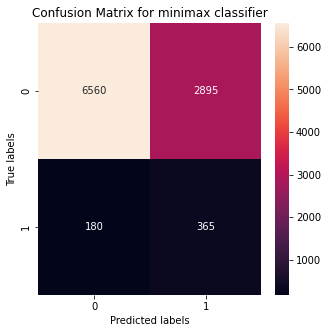

In [28]:
confusionMat=sklearn.metrics.confusion_matrix(df2['Y'],y_pred)
confusionMat
ax= plt.subplots(figsize=(5,5))

ax=sns.heatmap(confusionMat, annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for minimax classifier'); 